In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [2]:
NL_t = -0.4
NL_c = 0.01
NL_L = 1.8
NL_mu = 0.3

mass = 938.272045e6
ke = 2.5*1.0e6
energy = ke+mass
freq = 30*1.0e6

g = energy/mass
bg = np.sqrt(g**2-1.0)
vec = bg/g*impact.data.clight

turns = 2048

alfaEntrance = np.tan(np.pi*NL_mu)
betaEntrance = NL_L/np.sin(2.0*np.pi*NL_mu)

In [3]:
print(alfaEntrance,betaEntrance)

1.3763819204711734 1.8926320036288808


# def subroutine 

In [3]:
def croot(z):
    return np.sqrt(1.0-z**2)

def carcsin(z):
    return -1j*np.log(1j*z+croot(z))

def Fpotential(x,y):
    zeta = x+1j*y
    return zeta/croot(zeta)*carcsin(zeta)

def Fderivative(x,y):
    zeta = x+1j*y
    denom = croot(zeta)
#     print(carcsin(zeta))
#     print(zeta/denom**2, carcsin(zeta)/denom**3)
    return zeta/denom**2 + carcsin(zeta)/denom**3

def driftpropagator(x,px,y,py,ds):
    x= x+px*ds
    y= y+py*ds
    return x,px,y,py

def NLpropagator(x,px,y,py,ds):
    dF = Fderivative(x,y)
    px = px - x*ds + np.real(dF)*ds*NL_t
    py = py - y*ds - np.imag(dF)*ds*NL_t
    return x,px,y,py


def InvariantPotentials(x,px,y,py):
    zeta = x+1j*y
    zetaconj = x-1j*y
    Hpotential = zeta/croot(zeta)
    Ipotential = (zeta+zetaconj)/croot(zeta)   
    Hpotential = Hpotential*carcsin(zeta)
    Ipotential = Ipotential*carcsin(zeta)
    Hinv = -NL_t*np.real(Hpotential) + 0.5*(x**2+px**2+y**2+py**2)
    Iinv = -NL_t*np.real(Ipotential) + (x*py - y*px)**2 + x**2 + px**2
    return Hinv,Iinv
    
def track(x,px,y,py,L,n):
    ds = L/n
    data = np.zeros((6,n+1))
    for i in range(n):
        data[:4,i] = x,px,y,py
        data[4:,i] = InvariantPotentials(x,px,y,py)
        x,px,y,py = driftpropagator(x,px,y,py,0.5*ds)
        x,px,y,py = NLpropagator(x,px,y,py,ds)
        x,px,y,py = driftpropagator(x,px,y,py,0.5*ds)
    data[:4,-1] = x,px,y,py
    data[4:,-1] = InvariantPotentials(x,px,y,py)
    return data

In [6]:
#dt = np.dtype('Float128')
dt = np.dtype('Float64')
# x = np.array(0.290755, dtype=dt);
# y = np.array(0.0     , dtype=dt);
# px= np.array(0.40019 , dtype=dt);
# py= np.array(0.0     , dtype=dt);
x = 0.290755;
y = 0.0     ;
px= 0.40019 ;
py= 0.0     ;
Lrad = 3770
step_rad = int(np.round(1000/(0.3*2.0*np.pi)))
data = track(x,px,y,py,Lrad,Lrad*step_rad)
print(step_rad)

/home/kileanhwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


531


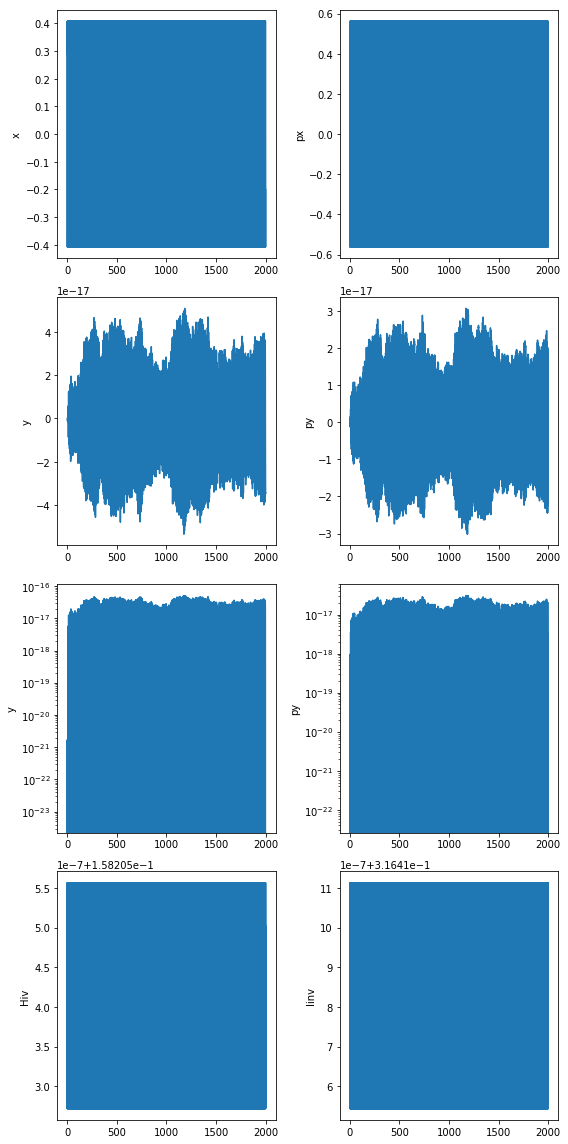

In [7]:
X = np.linspace(0,Lrad/1.885,Lrad*step_rad+1)
plt.figure(figsize=(8,16))
plt.subplot(4,2,1)
plt.plot(X,data[0,:])
plt.ylabel('x')
plt.subplot(4,2,2)
plt.plot(X,data[1,:])
plt.ylabel('px')
plt.subplot(4,2,3)
plt.plot(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,4)
plt.plot(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,5)
plt.semilogy(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,6)
plt.semilogy(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,7)
plt.plot(X,data[4,:])
plt.ylabel('Hiv')
plt.subplot(4,2,8)
plt.plot(X,data[5,:])
plt.ylabel('Iinv')
plt.tight_layout()

In [5]:
#dt = np.dtype('Float128')
dt = np.dtype('Float64')
# x = np.array(0.290755, dtype=dt);
# y = np.array(0.0     , dtype=dt);
# px= np.array(0.40019 , dtype=dt);
# py= np.array(0.0     , dtype=dt);
x = 0.290755;
y = 0.0     ;
px= 0.40019 ;
py= 0.0     ;
Lrad = 3770
step_rad = int(np.round(1000*(0.3*2.0*np.pi)/1.8))
data = track(x,px,y,py,Lrad,Lrad*step_rad)
print(step_rad)

/home/kileanhwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


1047


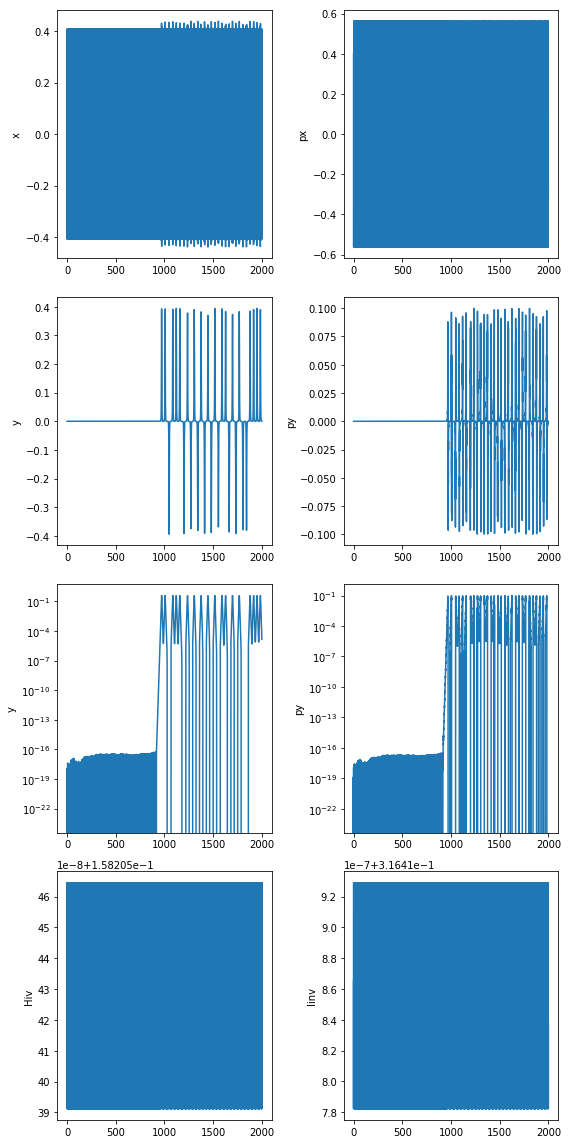

In [6]:
X = np.linspace(0,Lrad/1.885,Lrad*step_rad+1)
plt.figure(figsize=(8,16))
plt.subplot(4,2,1)
plt.plot(X,data[0,:])
plt.ylabel('x')
plt.subplot(4,2,2)
plt.plot(X,data[1,:])
plt.ylabel('px')
plt.subplot(4,2,3)
plt.plot(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,4)
plt.plot(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,5)
plt.semilogy(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,6)
plt.semilogy(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,7)
plt.plot(X,data[4,:])
plt.ylabel('Hiv')
plt.subplot(4,2,8)
plt.plot(X,data[5,:])
plt.ylabel('Iinv')
plt.tight_layout()

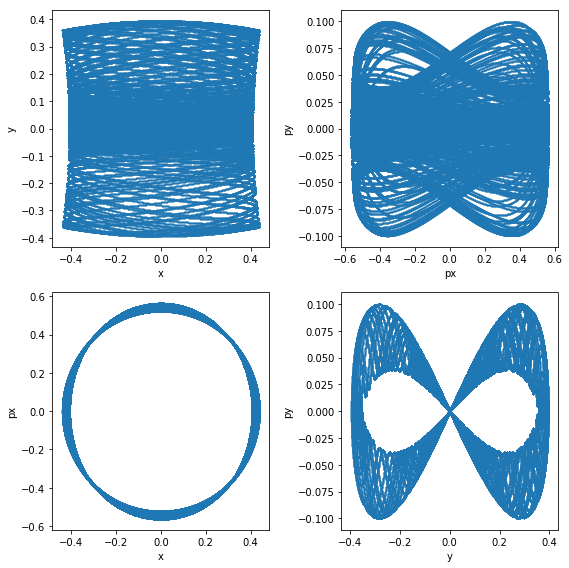

In [15]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(data[0,:],data[2,:],s=0.1)
plt.xlabel('x');
plt.ylabel('y');
plt.subplot(2,2,2)
plt.scatter(data[1,:],data[3,:],s=0.1)
plt.xlabel('px');
plt.ylabel('py');
plt.subplot(2,2,3)
plt.scatter(data[0,:],data[1,:],s=0.1)
plt.xlabel('x');
plt.ylabel('px');
plt.subplot(2,2,4)
plt.scatter(data[2,:],data[3,:],s=0.1)
plt.xlabel('y');
plt.ylabel('py');
plt.tight_layout()

In [21]:
#dt = np.dtype('Float128')
dt = np.dtype('Float64')
# x = np.array(0.290755, dtype=dt);
# y = np.array(0.0     , dtype=dt);
# px= np.array(0.40019 , dtype=dt);
# py= np.array(0.0     , dtype=dt);
x = 0.290755;
y = 0.0     ;
px= 0.40019 ;
py= 0.0     ;
Lrad = 3000
step_rad = 25
data = track(x,px,y,py,Lrad,Lrad*step_rad)
print(step_rad)

/home/kileanhwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


25


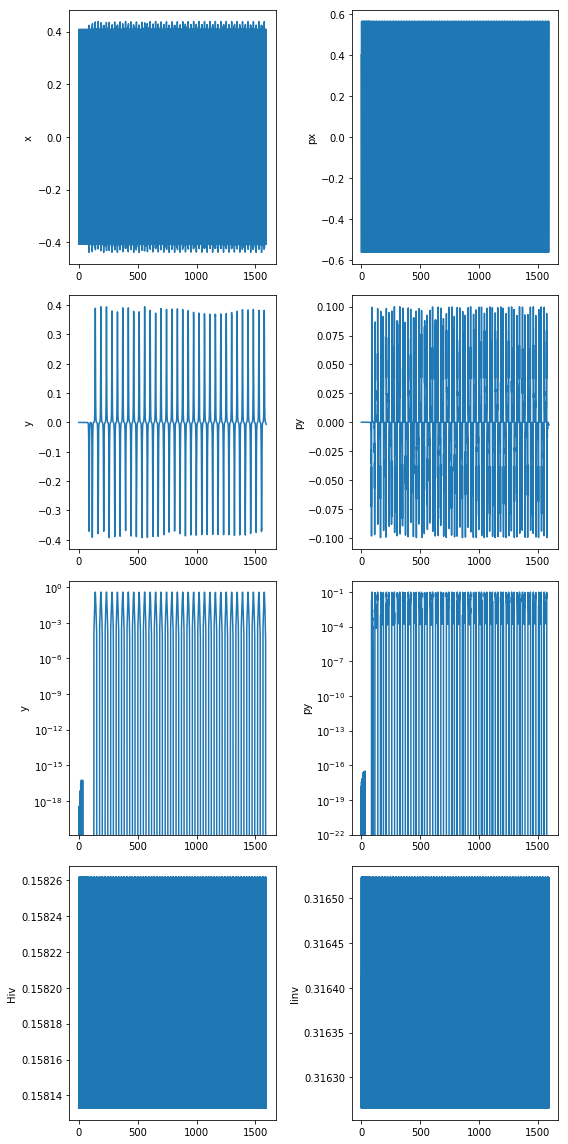

In [22]:
X = np.linspace(0,Lrad/1.885,Lrad*step_rad+1)
plt.figure(figsize=(8,16))
plt.subplot(4,2,1)
plt.plot(X,data[0,:])
plt.ylabel('x')
plt.subplot(4,2,2)
plt.plot(X,data[1,:])
plt.ylabel('px')
plt.subplot(4,2,3)
plt.plot(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,4)
plt.plot(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,5)
plt.semilogy(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,6)
plt.semilogy(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,7)
plt.plot(X,data[4,:])
plt.ylabel('Hiv')
plt.subplot(4,2,8)
plt.plot(X,data[5,:])
plt.ylabel('Iinv')
plt.tight_layout()

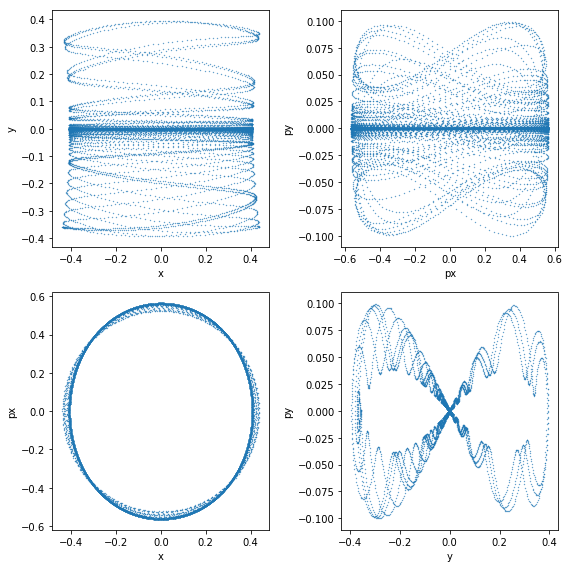

In [14]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(data[0,:],data[2,:],s=0.1)
plt.xlabel('x');
plt.ylabel('y');
plt.subplot(2,2,2)
plt.scatter(data[1,:],data[3,:],s=0.1)
plt.xlabel('px');
plt.ylabel('py');
plt.subplot(2,2,3)
plt.scatter(data[0,:],data[1,:],s=0.1)
plt.xlabel('x');
plt.ylabel('px');
plt.subplot(2,2,4)
plt.scatter(data[2,:],data[3,:],s=0.1)
plt.xlabel('y');
plt.ylabel('py');
plt.tight_layout()

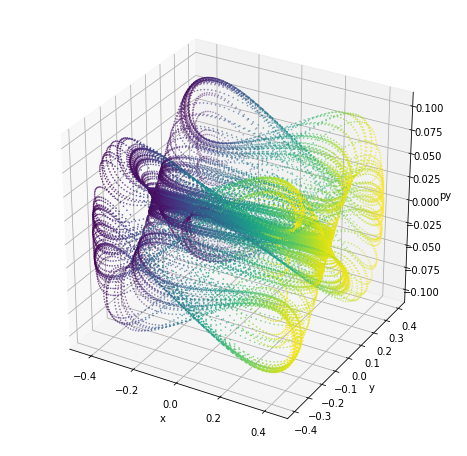

In [24]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0,:],data[2,:],data[3,:],s=0.4,c=data[0,:],marker='o')
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('py');

In [10]:
dt = np.dtype('Float128')
x = np.array(0.290755, dtype=dt);
y = np.array(0.0     , dtype=dt);
px= np.array(0.40019 , dtype=dt);
py= np.array(0.0     , dtype=dt);
# x = 0.290755;
# y = 0.0     ;
# px= 0.40019 ;
# py= 0.0     ;
Lrad = 3770
step_rad = int(np.round(1000*(0.3*2.0*np.pi)/1.8))
data = track(x,px,y,py,Lrad,Lrad*step_rad)
print(step_rad)

/home/kileanhwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


1047


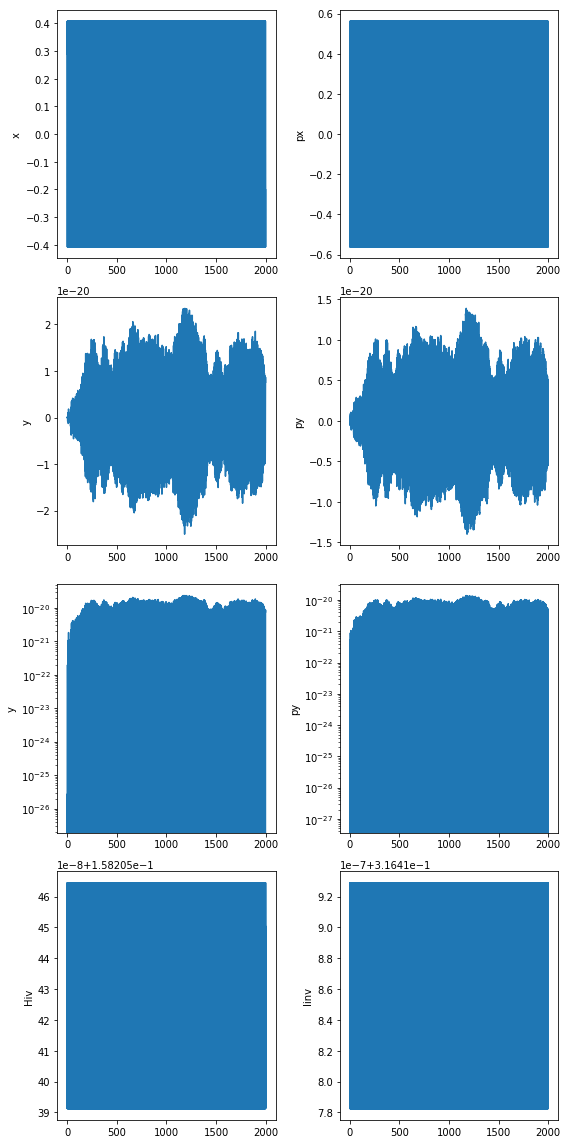

In [11]:
X = np.linspace(0,Lrad/1.885,Lrad*step_rad+1)
plt.figure(figsize=(8,16))
plt.subplot(4,2,1)
plt.plot(X,data[0,:])
plt.ylabel('x')
plt.subplot(4,2,2)
plt.plot(X,data[1,:])
plt.ylabel('px')
plt.subplot(4,2,3)
plt.plot(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,4)
plt.plot(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,5)
plt.semilogy(X,data[2,:])
plt.ylabel('y')
plt.subplot(4,2,6)
plt.semilogy(X,data[3,:])
plt.ylabel('py')
plt.subplot(4,2,7)
plt.plot(X,data[4,:])
plt.ylabel('Hiv')
plt.subplot(4,2,8)
plt.plot(X,data[5,:])
plt.ylabel('Iinv')
plt.tight_layout()

In [35]:
dt = np.dtype('Float64')
x = np.array(0.4, dtype=dt);
y = np.array(0.0, dtype=dt);
print(Fderivative(0.4,0.0))

dt = np.dtype('Float128')
x = np.array(0.4, dtype=dt);
y = np.array(0.0, dtype=dt);
print(Fderivative(x,y))

(0.41151684606748806+3.321322666330305e-18j)
(0.4761904761904762+0j) (0.534525821103672+4.314119196664168e-18j)
(1.0107162972941481+4.314119196664168e-18j)
(0.4115168460674880436-7.531144783457629243e-21j)
(0.47619047619047622698+0j) (0.53452582110367191523-9.78232455778525953e-21j)
(1.0107162972941481422-9.78232455778525953e-21j)


/home/kileanhwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.
/home/kileanhwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


In [55]:
def croot(z):
    return np.sqrt(1.0-z**2)

def carcsin(z):
    return np.arcsin(z)

def Fpotential(x,y):
    zeta = x+1j*y
    return zeta/croot(zeta)*carcsin(zeta)

def Fderivative(x,y):
    zeta = x+1j*y
    denom = croot(zeta)
    print(carcsin(zeta))
    print(zeta/denom**2, carcsin(zeta)/denom**3)
    return zeta/denom**2 + carcsin(zeta)/denom**3

In [56]:
dt = np.dtype('Float64')
x = np.array(0.4, dtype=dt);
y = np.array(0.0, dtype=dt);
print(Fderivative(0.4,0.0))

dt = np.dtype('Float128')
x = np.array(0.4, dtype=dt);
y = np.array(0.0, dtype=dt);
print(Fderivative(x,y))

(0.41151684606748806+0j)
(0.4761904761904762+0j) (0.534525821103672+0j)
(1.0107162972941481+0j)
(0.4115168460674880436+0j)
(0.47619047619047622698+0j) (0.53452582110367191523+0j)
(1.0107162972941481422+0j)


/home/kileanhwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.
/home/kileanhwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
